<a href="https://colab.research.google.com/github/Olesiewitch/Predictive_Analytics/blob/master/APA_Econml_Hilstrom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Main imports 
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner
import econml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

%matplotlib inline 

dataurl='https://raw.githubusercontent.com/Olesiewitch/Predictive_Analytics/master/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv'

In [0]:
df=pd.read_csv(dataurl)

In [0]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})

In [34]:
df.keys()

Index(['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code',
       'newbie', 'channel', 'segment', 'visit', 'conversion', 'spend'],
      dtype='object')

In [8]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 5.9+ MB


In [10]:
df['segment'].head()

0    Womens E-Mail
1        No E-Mail
2    Womens E-Mail
3      Mens E-Mail
4    Womens E-Mail
Name: segment, dtype: object

In [0]:
def generate_feature_repr(values):
  feature_names = list(set(values))
  feature_names.sort()
  feature_values = []
  for feature_name in feature_names:
      value = values[values==feature_name].shape[0]
      feature_values.append(value)
  return pd.DataFrame(data={
      'Name': feature_names,
      'Value':feature_values
  })

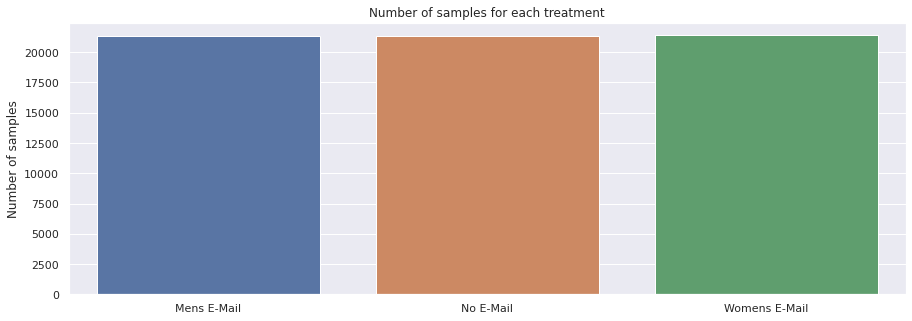

In [13]:
df_repr= generate_feature_repr(df['segment'])
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(
    xlabel='',
    ylabel='Number of samples',
    title='Number of samples for each treatment'
);

In [17]:
# Inspect Target Variable
# Target variable -spend

target=df['spend']
non_zero = target[target !=0].shape[0]

print("{}% - of samples actually spent". format(100 * non_zero / target.shape[0]))


0.903125% - of samples actually spent


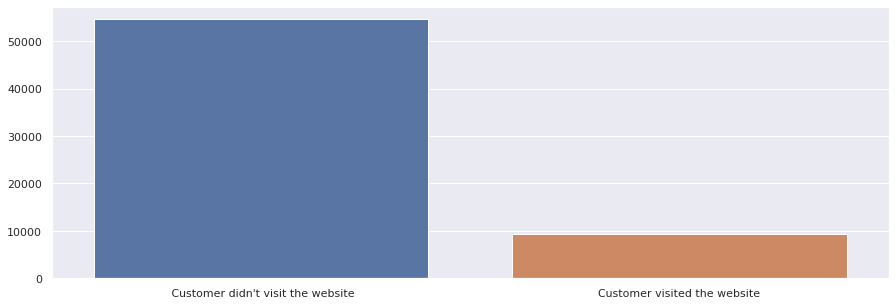

In [19]:
# TARGET VARIABLE- VISIT
# 1/0 INDICATOR, 1 = Customer visited webiste in the following two weeks

df_repr = generate_feature_repr(df['visit'].values)
df_repr['Name'] = df_repr['Name'].apply(lambda x: 'Customer visited the website' if x else 
                                        " Customer didn't visit the website")
ax= sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');


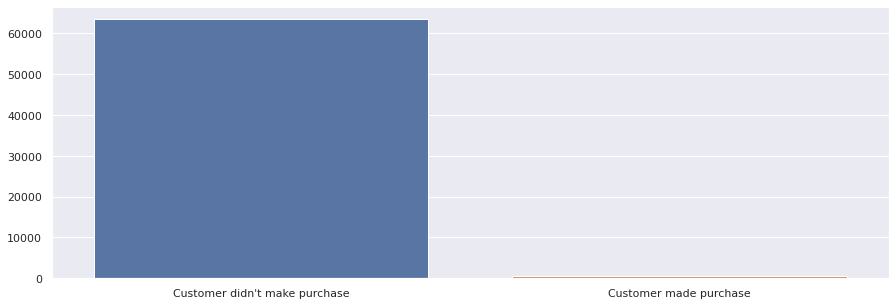

In [20]:
#  Target Variable -Conversion:

df_repr= generate_feature_repr(df['conversion'].values)
df_repr['Name']=df_repr['Name'].apply(lambda x: 'Customer made purchase' if x else "Customer didn't make purchase")
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

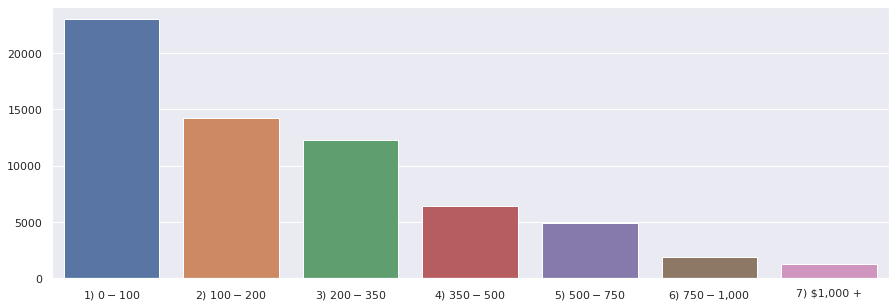

In [21]:
# Inspect Features
# Feature: History_segment

df_repr = generate_feature_repr(df['history_segment'].values)
ax=sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='', ylabel='');

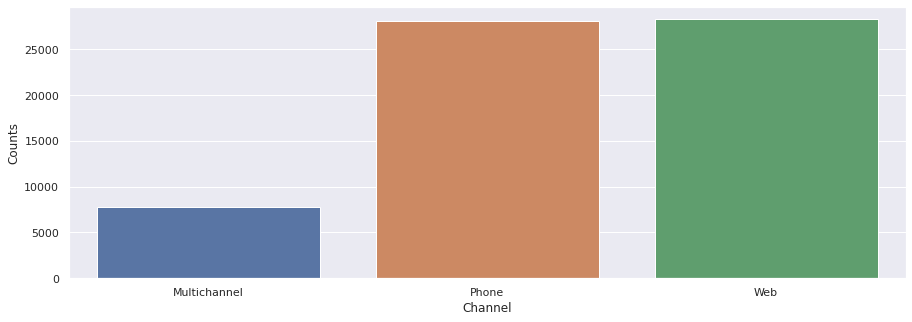

In [28]:
df_repr = generate_feature_repr(df['channel'].values)
ax = sns.barplot(x='Name', y='Value', data=df_repr)
ax.set(xlabel='ChanneY, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)l', ylabel='Counts', title='');

In [57]:
df['history_segment'].head()

0    $100 - $200
1    $200 - $350
2    $100 - $200
3    $500 - $750
4      $0 - $100
Name: history_segment, dtype: object

In [0]:
# data cleaning

df['history_segment'] = df['history_segment'].apply(lambda s: s.split(') ')[1])
df['history_segment'] = df['history_segment'].astype(str)
df['history_segment'] = [i.replace('$', '').replace(',', '').replace('-', '_').replace(' ', '') for i in df['history_segment']]


In [70]:
df.head()

,recency,history,mens,womens,newbie,Treatment,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_0_100,history_segment_1000+,history_segment_100_200,history_segment_200_350,history_segment_350_500,history_segment_500_750,history_segment_750_1000,channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,2,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0
1,6,329.08,1,1,1,0,0,0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,1
2,7,180.65,0,1,1,2,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,9,675.83,1,0,1,1,0,0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,2,45.34,1,0,0,2,0,0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [0]:
# column types to numeric??

# Rename columns 
df = df.rename(columns= {'segment' : 'Treatment'})

# Create dummy columns
dummy_cols = ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df = pd.get_dummies(df, columns=[col], prefix=col)

# Encode the 'Treatment' Column

treatment_encoder = {'No E-Mail': 0, 'Mens E-Mail': 1, 'Womens E-Mail': 2}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])

In [73]:
df.head()

,recency,history,mens,womens,newbie,Treatment,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,10,142.44,1,0,0,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,6,329.08,1,1,1,0,0,0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1
2,7,180.65,0,1,1,2,0,0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,9,675.83,1,0,1,1,0,0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,2,45.34,1,0,0,2,0,0,0.0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [0]:
# Normalize data

normalization_fields = ['recency', 'history']
df[normalization_fields] = (df[normalization_fields] - df[normalization_fields].mean()) / df[normalization_fields].std()

In [0]:
##

In [0]:
### Define Covariates, treatments and responses 
# x= data_clean['feature']

y=data_clean['response_visit']

# treatment
T= data_clean['treatment']